# Statistical Analysis

## Imports

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from clean import *

# Load the datasets
df_teams = pd.read_csv("dataset/teams.csv")
df_teams_post = pd.read_csv("dataset/teams_post.csv")
df_series_post = pd.read_csv("dataset/series_post.csv")
df_players = pd.read_csv("dataset/players.csv")
df_players_teams = clean_teams_players(pd.read_csv("dataset/players_teams.csv"))
df_coaches = pd.read_csv("dataset/coaches.csv")
df_awards_players = pd.read_csv("dataset/awards_players.csv")

dfs = [df_teams, df_teams_post, df_series_post, df_players, df_players_teams, df_coaches, df_awards_players]
dfs_names = ["teams", "teams_post", "series_post", "players", "players_teams", "coaches", "awards_players"]

In [98]:
def show_corr_matrix(df, threshold=0.8):
    correlation_matrix = df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    num_corr_greater_than_08 = ((correlation_matrix.where(np.tril(
        np.ones(correlation_matrix.shape), k=-1).astype(bool)) > threshold).sum()).sum()
    print("Number of correlation values greater than 0.8:",
          num_corr_greater_than_08)


In [99]:
def show_box_plots(df):
    num_cols = int(len(df.columns)/3)+1
    num_rows = 3
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))
    axs = axs.flatten()

    for i, col in enumerate(df.columns):

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = len(
            df[(df[col] < lower_bound) | (df[col] > upper_bound)])

        axs[i].boxplot(df[col])
        axs[i].set_ylim(df[col].min() - 0.1 * df[col].max(),
                        df[col].max() + 0.1 * df[col].max())

        axs[i].set_xlabel(f"mean: {df[col].mean():.2f}")

        if num_outliers > 40:
            axs[i].set_title(f"{col} ({num_outliers} outliers)", color='red')
        else:
            axs[i].set_title(f"{col} ({num_outliers} outliers)")

    fig.suptitle("Box Plots for Attributes")
    plt.tight_layout()
    plt.show()


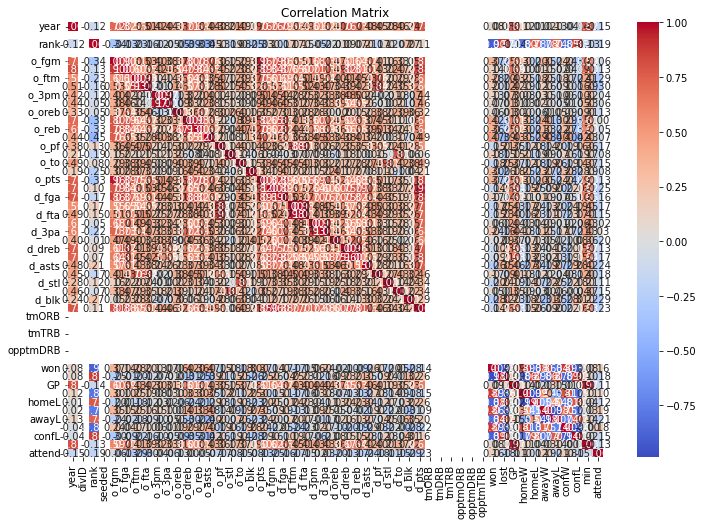

Number of correlation values greater than 0.8: 46
Error in teams


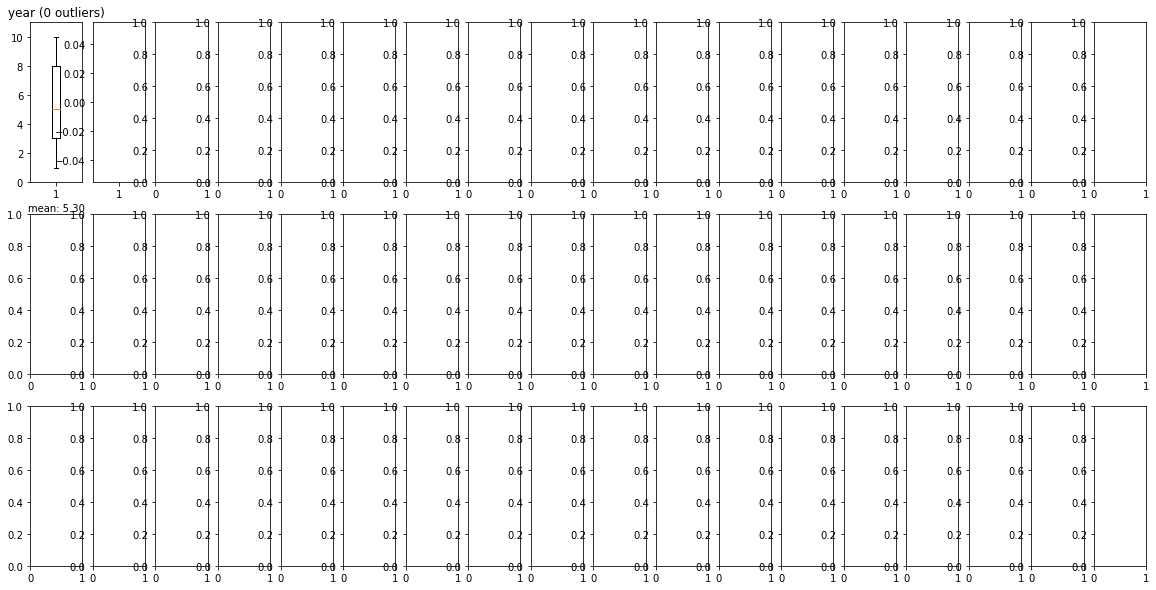

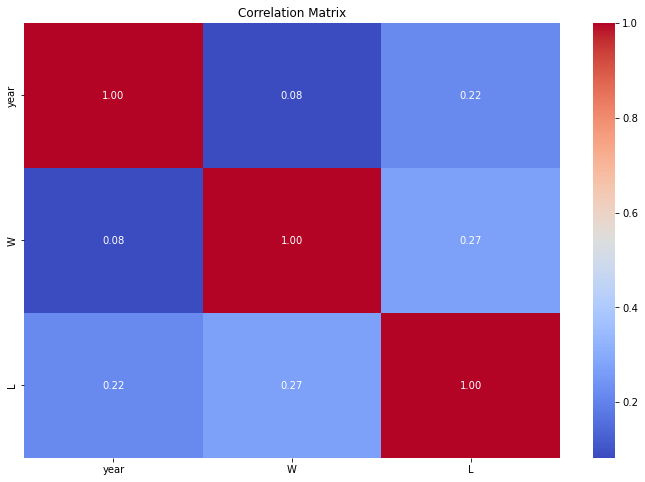

Number of correlation values greater than 0.8: 0


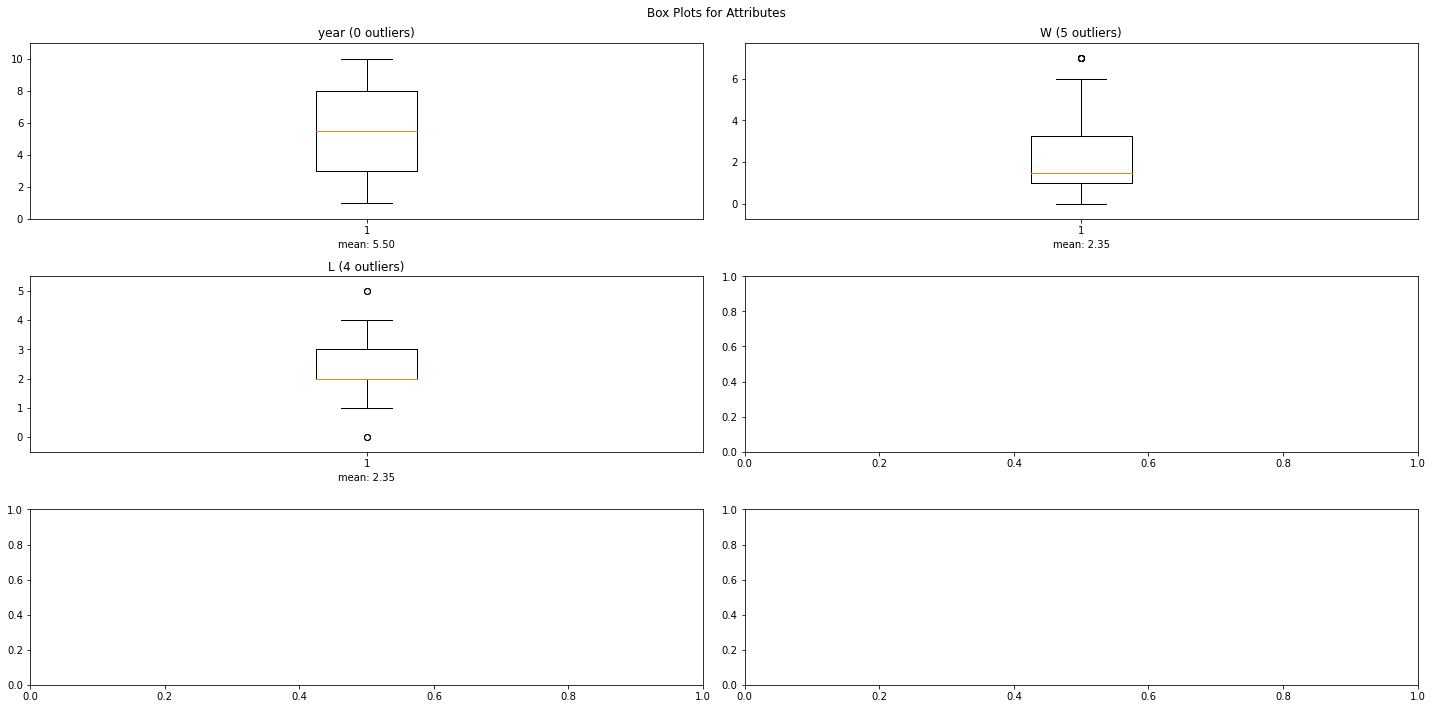

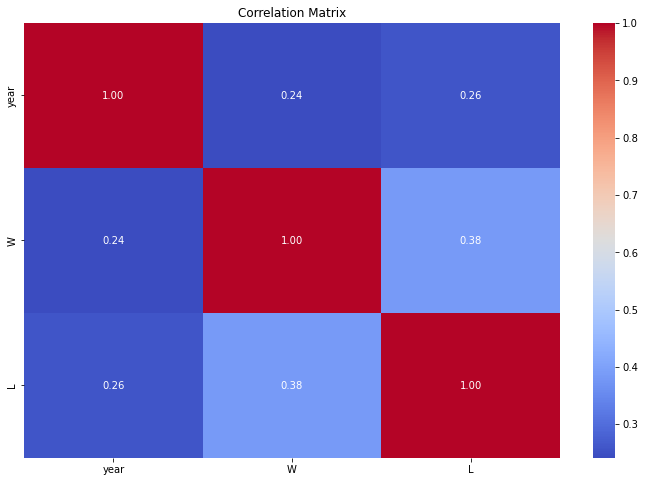

Number of correlation values greater than 0.8: 0


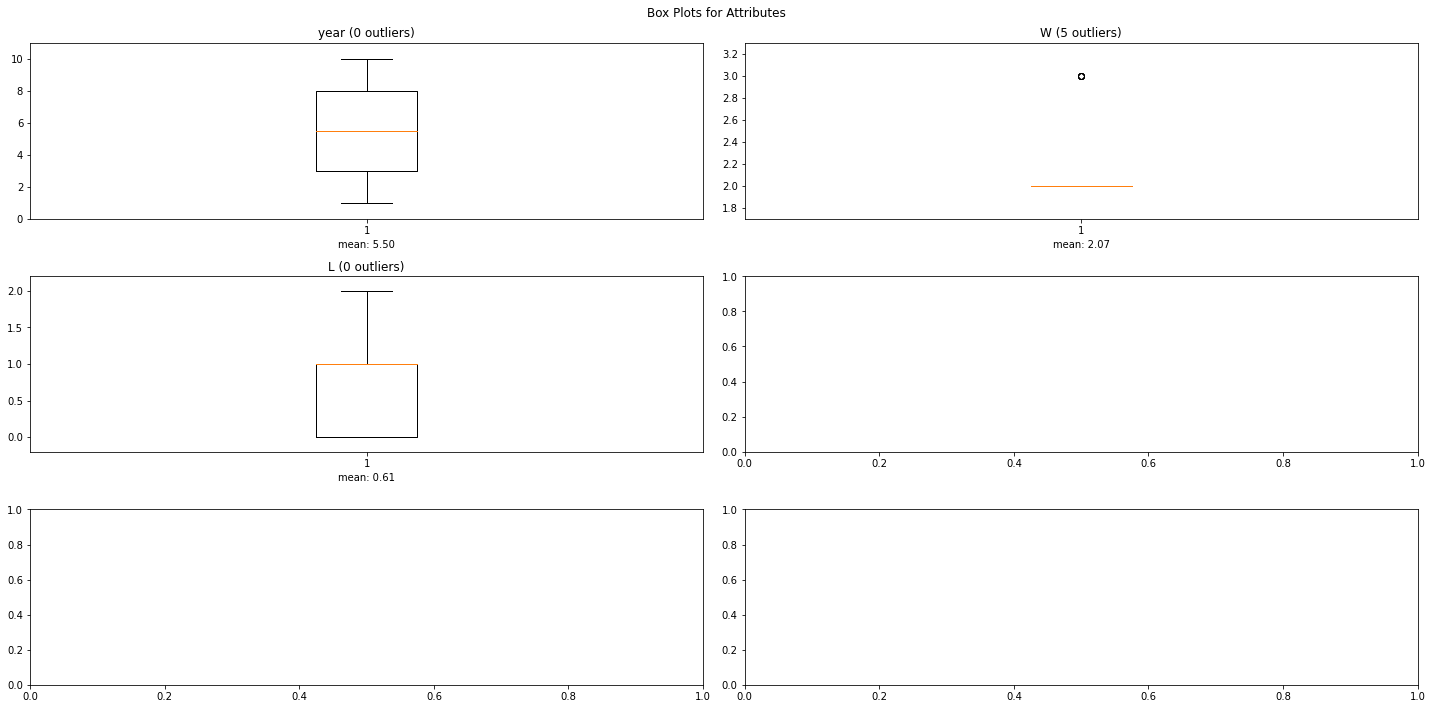

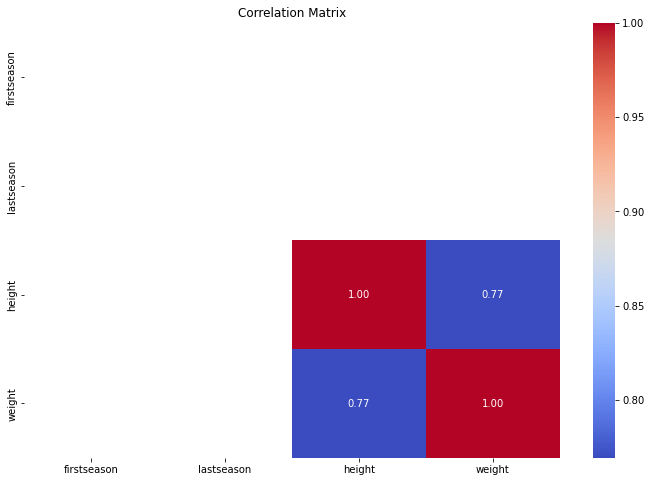

Number of correlation values greater than 0.8: 0


/tmp/ipykernel_4823/1635279136.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axs[i].set_ylim(df[col].min() - 0.1 * df[col].max(),
/tmp/ipykernel_4823/1635279136.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axs[i].set_ylim(df[col].min() - 0.1 * df[col].max(),


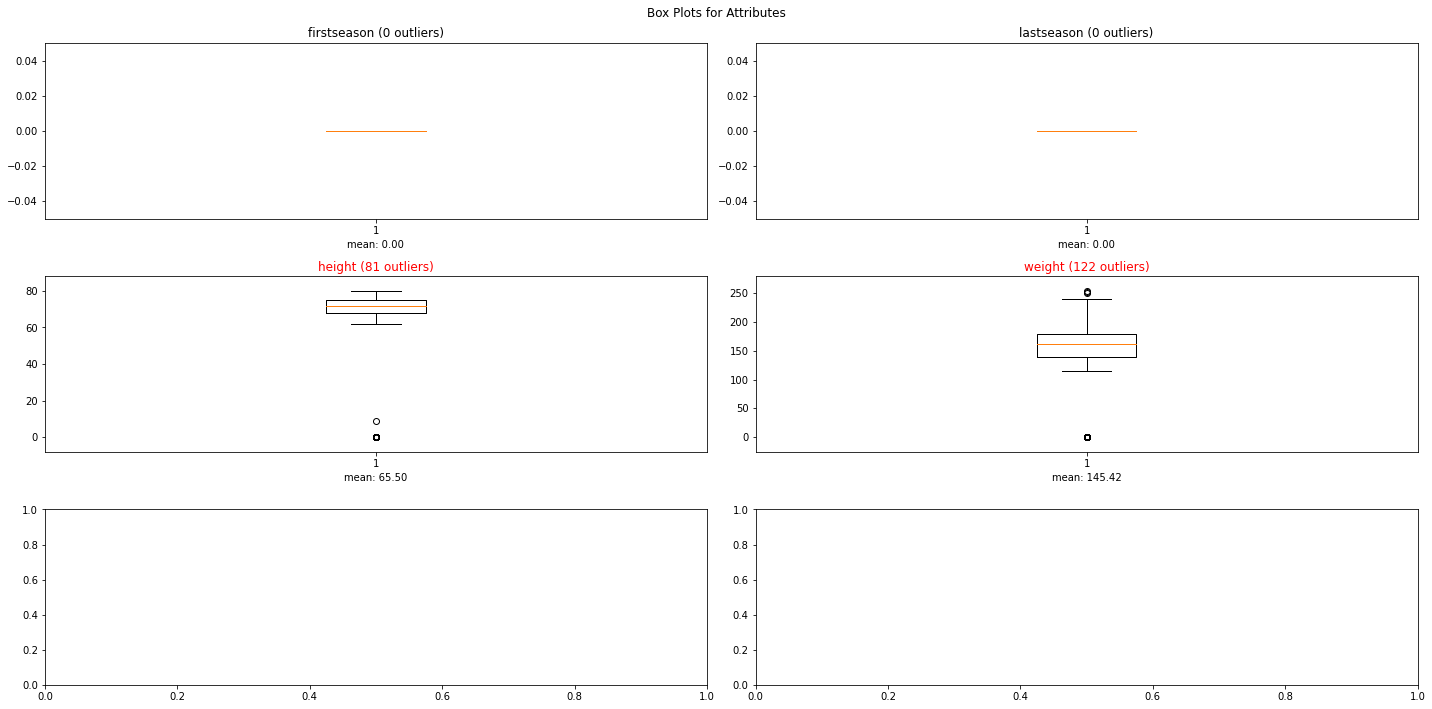

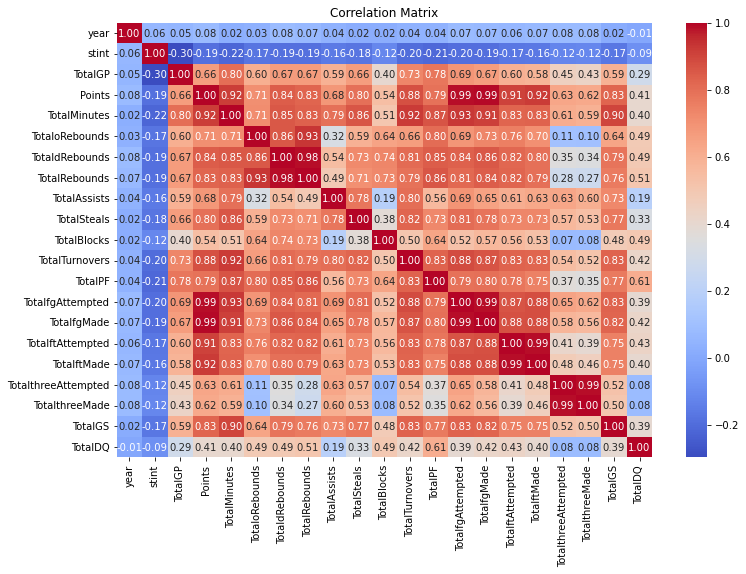

Number of correlation values greater than 0.8: 50


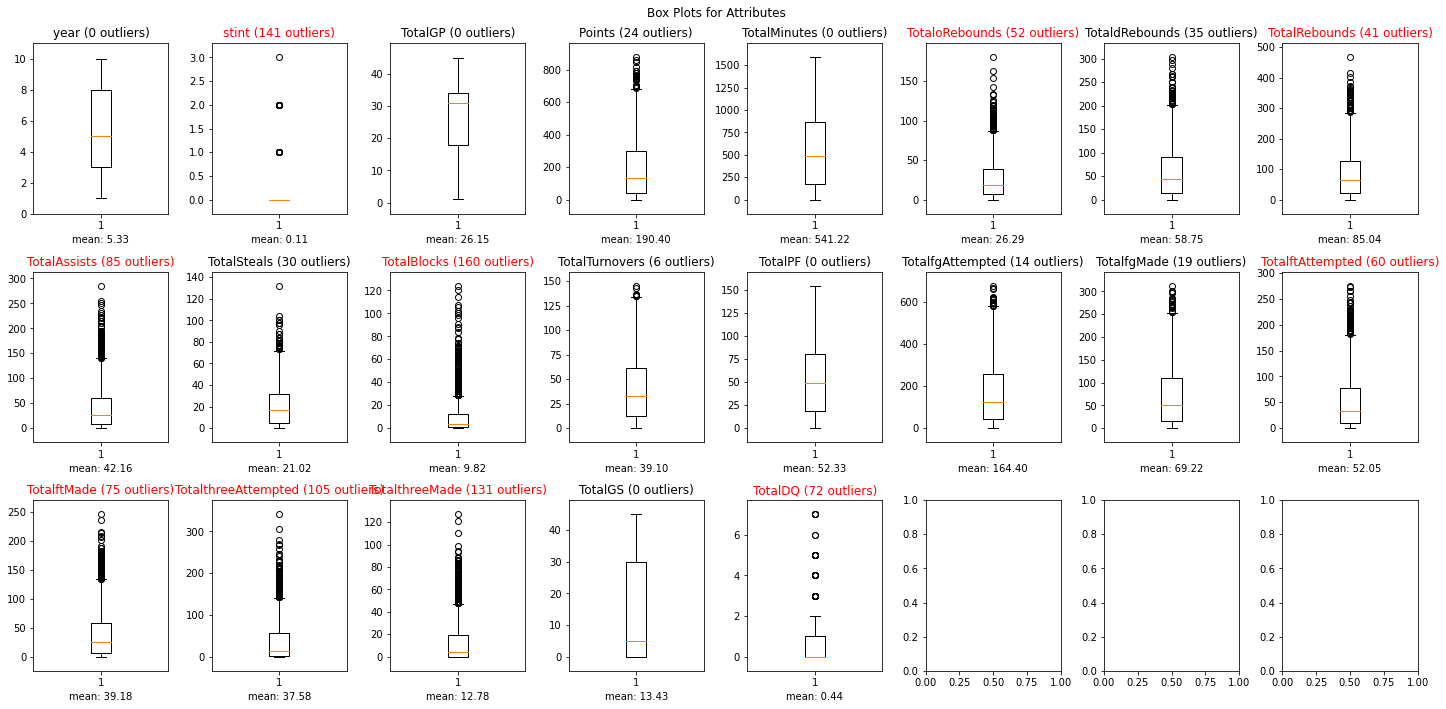

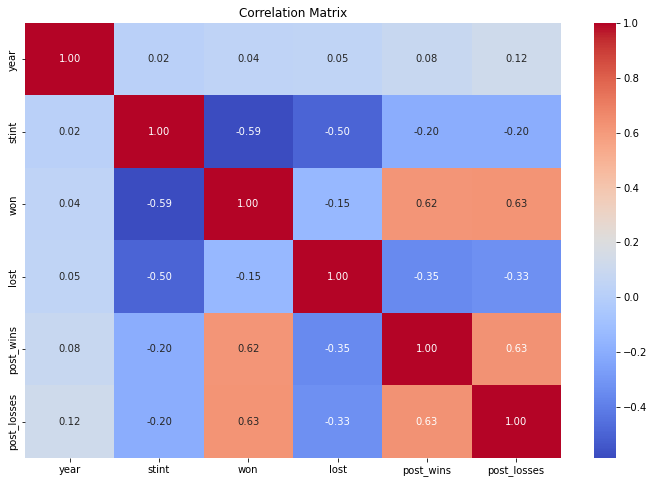

Number of correlation values greater than 0.8: 0


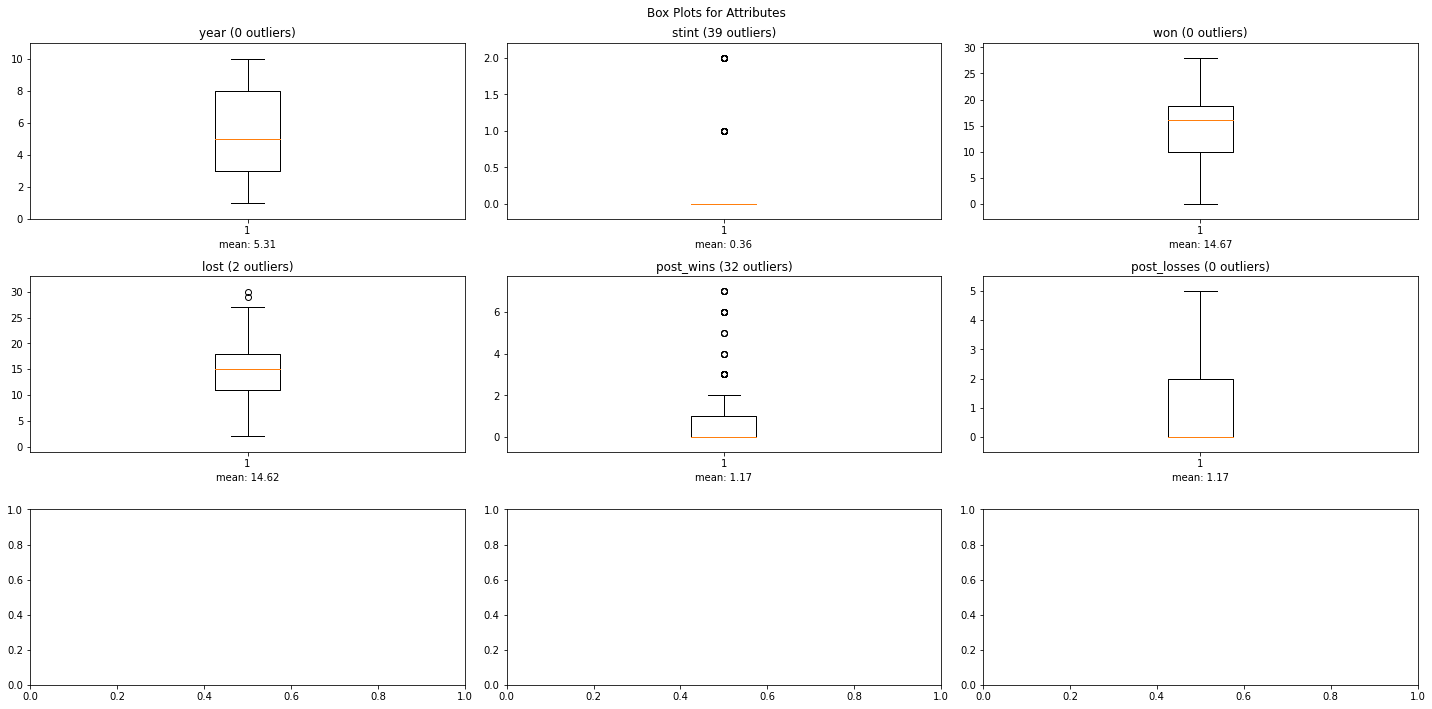

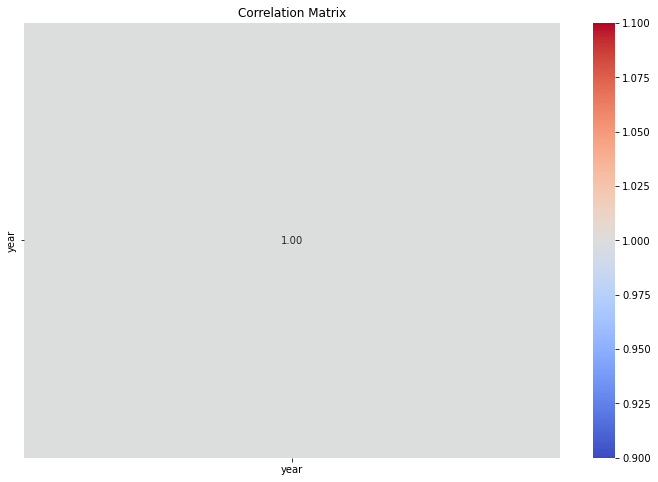

Number of correlation values greater than 0.8: 0


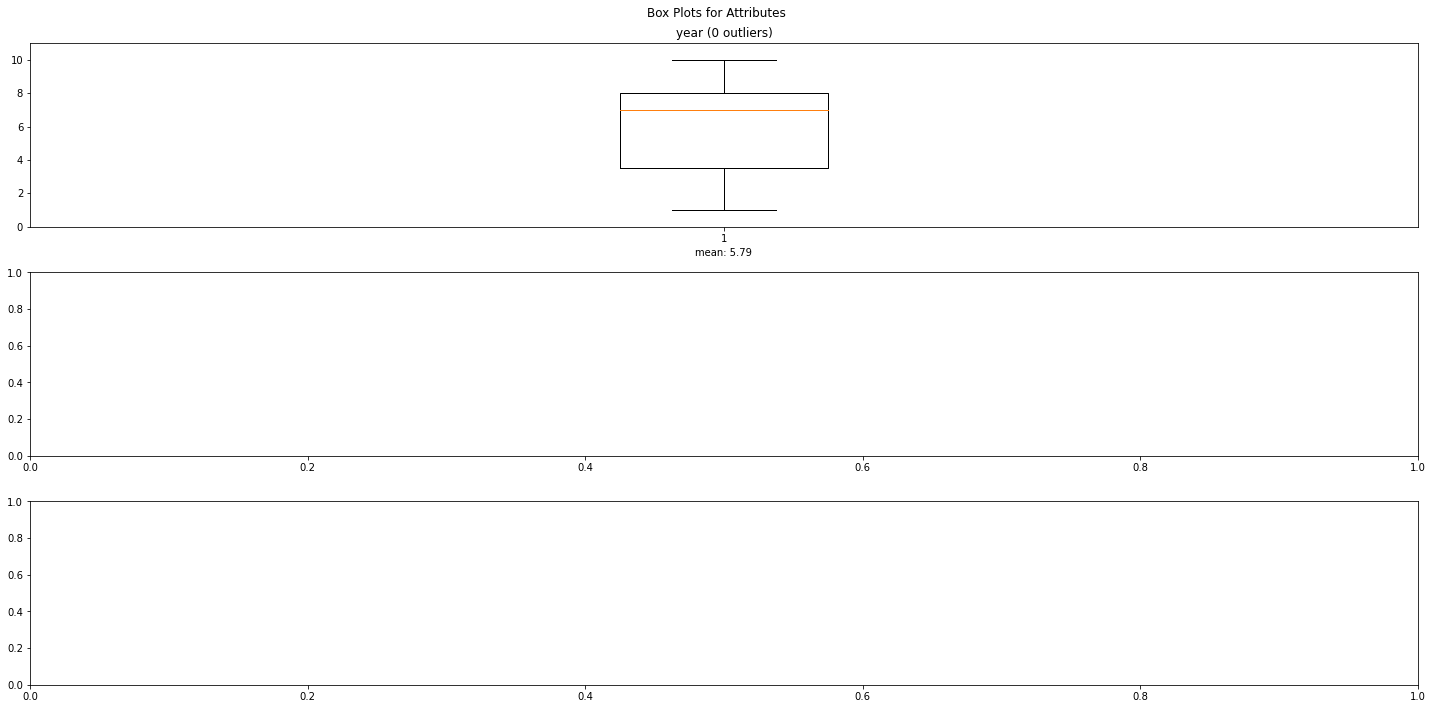

In [104]:
for df, name in zip(dfs, dfs_names):

    try:
        # remove columns that have non-numeric values
        df = df.select_dtypes(include=np.number)

        show_corr_matrix(df)
        show_box_plots(df)
    except:
        print(f"Error in {name}")
        continue
